## Tomek Links

Tomek links are 2 samples from a different class, which are nearest neighbours to each other. In other words, if 2 observations are nearest neighbours, and from a different class, they are Tomek Links.

This procedures removes either the sample from the majority class if it is a Tomek Link, or alternatively, both observations, the one from the majority and the one from the minority class.

====

- **Criteria for data exclusion**: Samples are Tomek Links
- **Final Dataset size**: varies

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# for metrics
from sklearn.metrics import roc_auc_score

# from imblearn
from imblearn.under_sampling import TomekLinks

## create simulated data

In [2]:
# function to create simulated data
def create_data(sep):
    
    X,y = make_classification(n_samples=1000,
                              n_features=2,
                              n_redundant=0,
                              n_clusters_per_class=1,
                              weights=[0.99],
                              class_sep=sep,
                              random_state=0)
    
    X = pd.DataFrame(X, columns=['varA','varB'])
    y = pd.Series(y)
    
    return X,y

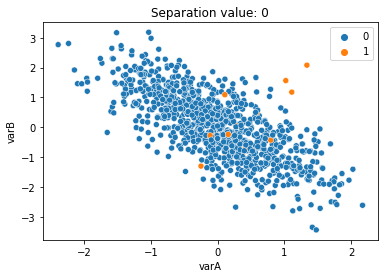

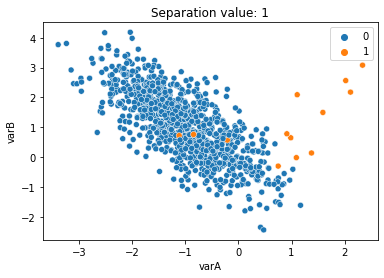

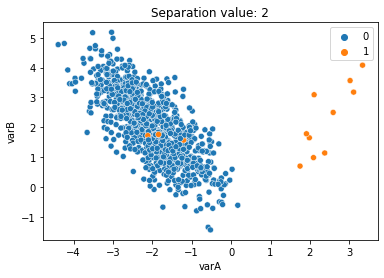

In [3]:
# create data for different sep values and plot them
for i in [0,1,2]:
    X,y = create_data(i)
    
    #df = pd.DataFrame(pd.concat([X,y], axis = 1), columns = ['varA','varB','target'])
    
    # plot
    sns.scatterplot(data = X, x = 'varA', y ='varB', hue=y)
    plt.title('Separation value: {}'.format(i))
    plt.show()
    

In [4]:
# original data shape
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# original data value counts
y.value_counts()

0    984
1     16
dtype: int64

## resample using TomekLinks method

In [6]:
# lets generate data when sep = 2
X,y = create_data(sep=2)

In [8]:
tl = TomekLinks(sampling_strategy='auto', # this will remove obs from the majority class by default
                                 n_jobs=2)

X_res, y_res = tl.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(999, 2) (999,)
Value Counts: 
0    983
1     16
dtype: int64


- Tomek Links removes only one observation from the Majority Class in this case

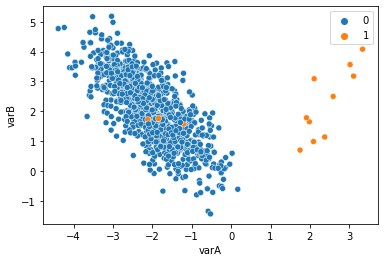

In [9]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

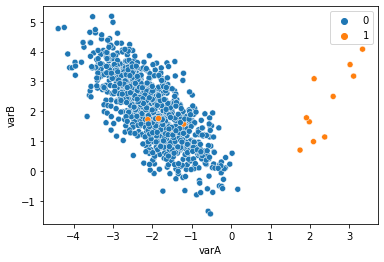

In [10]:
# resampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

Cannot see much difference as only one observation is removed from the majority class. Lets check on a dataset with lesser degree of separation.

## Lets check for a partially separated class

In [11]:
X,y = create_data(sep=0.5)

In [12]:
# create resampled data for the partially separated class dataset

tl = TomekLinks(sampling_strategy='auto', # this will reduce the majority class by default
                                 n_jobs=2)

X_res, y_res = tl.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(997, 2) (997,)
Value Counts: 
0    981
1     16
dtype: int64


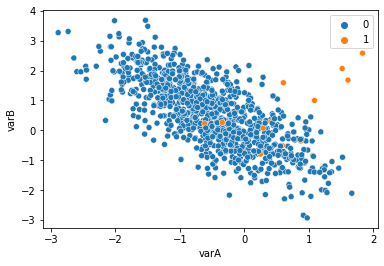

In [13]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

# we can very less separation and much overlapped since we provide a lower seperation value 

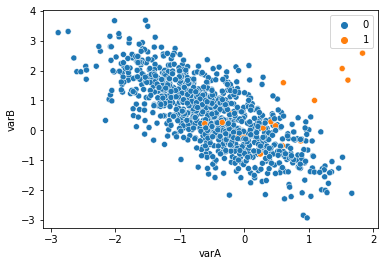

In [14]:
# resampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

- Similarly, here also we cannot see much difference as the number of observations removed from the majority class is very minimal

## Removing both from majority and minority class

In [15]:
# create resampled data for the partially separated class dataset

tl = TomekLinks(sampling_strategy='all',  # this will reduce the majority class by default
                                 n_jobs=2)

X_res, y_res = tl.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(994, 2) (994,)
Value Counts: 
0    981
1     13
dtype: int64


## Working on a real data

In [17]:
# sampling to only 10000 observations to speed up the computation
df = pd.read_csv('kdd2004.csv').sample(10000)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
97264,99.07,21.50,-0.37,-21.0,71.0,2651.8,1.41,-1.93,-15.0,-58.5,...,2433.8,-0.29,-1.21,-16.0,-93.0,422.8,1.34,0.35,0.12,-1
139900,65.79,28.04,0.33,-18.0,-7.5,1105.2,0.40,0.13,8.0,-69.5,...,1118.6,0.45,0.82,-6.0,-62.0,653.8,-1.33,0.30,0.58,-1
20282,83.33,22.63,-0.78,-24.0,108.5,2772.6,1.44,-0.97,-10.5,-69.0,...,4294.8,-0.32,-0.62,7.0,-116.0,2289.6,-3.23,0.12,0.12,-1
131461,32.18,29.23,-0.90,-16.5,14.5,1284.8,1.14,-0.52,4.5,-77.0,...,1914.0,-1.68,-0.42,6.0,-30.0,97.7,1.17,0.13,-0.60,-1
10918,76.64,25.19,-0.24,-4.5,-31.5,3849.9,-1.22,0.19,25.5,-140.0,...,3102.6,-1.50,-0.46,6.0,-49.0,301.1,1.12,0.53,0.02,-1


In [18]:
df.shape

(10000, 75)

In [19]:
# check the target values ratios
df['target'].value_counts()

-1    9909
 1      91
Name: target, dtype: int64

In [20]:
df['target'].value_counts()/len(df)

-1    0.9909
 1    0.0091
Name: target, dtype: float64

## split the data

In [21]:
X_train, X_test, y_train,y_test = train_test_split(df.drop('target', axis = 1),
                                                  df['target'],
                                                  test_size=0.3,
                                                  random_state=0)
X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [23]:
# now lets prepare our under resampled data sets
tl = TomekLinks(sampling_strategy='auto',
                                n_jobs=2)

X_tl, y_tl = tl.fit_resample(X_train, y_train)
X_tl.shape, y_tl.shape

((6995, 74), (6995,))

In [24]:
# target value ratio
y_tl.value_counts()

-1    6935
 1      60
Name: target, dtype: int64

The under-sampled data set is very similar to the original dataset, only 5 observations were removed. So there is no real point in testing the performance. The difference in performance will most likely be driven by the randomness of Random Forests than by the difference in the datasets.

## plot and compare

In [40]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
114031,78.57,27.27,1.86,21.5,-44.0,613.2,0.94,1.50,13.0,-82.0,...,-11.0,879.3,-0.33,0.11,0.0,-34.0,186.7,0.92,0.14,0.56
16068,73.71,23.26,0.39,12.5,52.5,2262.9,0.13,3.04,30.5,-98.0,...,7.0,2857.6,-0.15,-0.04,-10.0,-55.0,1378.2,-1.12,0.31,0.66
138902,39.47,36.67,-1.18,0.5,10.5,1877.0,-1.17,-1.08,-4.0,-75.5,...,-21.0,767.0,0.93,0.59,-7.0,-58.0,387.6,0.17,0.15,0.80
96340,55.36,29.03,-2.43,-15.0,28.0,1366.1,-2.35,-0.06,-2.0,-60.0,...,40.0,497.1,1.11,0.88,-1.0,-22.0,48.1,0.55,0.65,0.17
62198,59.68,25.93,-1.67,-13.5,69.0,2068.3,-2.18,1.16,6.5,-60.0,...,11.0,1551.2,0.20,1.72,5.0,-44.0,140.9,1.53,0.26,0.35


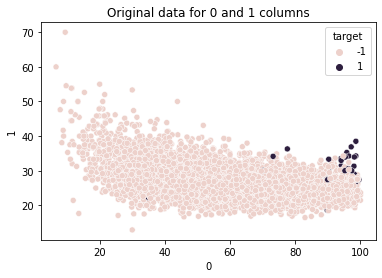

In [25]:
# original dataset

sns.scatterplot(data= X_train, x='0', y = '1', hue=y_train)
plt.title('Original data for 0 and 1 columns')
plt.show()

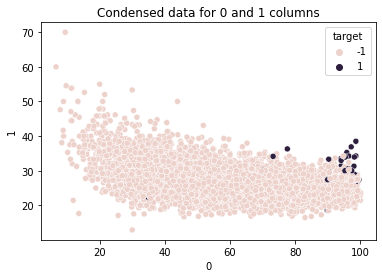

In [26]:
# under sampled dataset

sns.scatterplot(data= X_tl, x='0', y = '1', hue=y_tl)
plt.title('Condensed data for 0 and 1 columns')
plt.show()

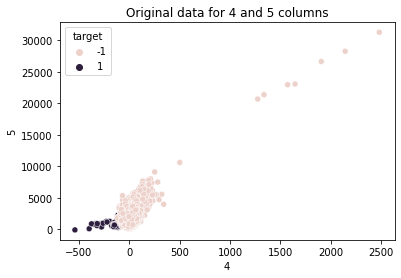

In [27]:
# original dataset

sns.scatterplot(data= X_train, x='4', y = '5', hue=y_train)
plt.title('Original data for 4 and 5 columns')
plt.show()

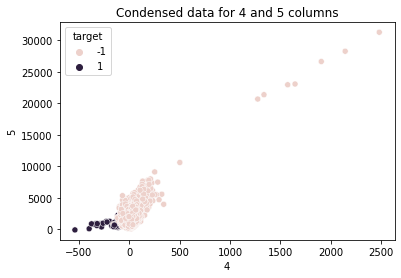

In [28]:
# condensed under sampled dataset

sns.scatterplot(data= X_tl, x='4', y = '5', hue=y_tl)
plt.title('Condensed data for 4 and 5 columns')
plt.show()

- Dont see much difference in the plots as the original and resampled datasets are pretty much similar 

## Model performance on original and condensed resample data

In [29]:
def create_randomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200,
                                n_jobs=2,
                                random_state=39,
                                max_depth=4)
    
    rf.fit(X_train, y_train)
    probs_train = rf.predict_proba(X_train)
    probs_test = rf.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [30]:
# for Original DataSet
create_randomForest(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9949087415946205
roc auc score for test data: 0.9831593128999663


In [31]:
# for re sampled dataset
create_randomForest(X_tl, X_test, y_tl, y_test)

roc auc score for train data: 0.9941840903628936
roc auc score for test data: 0.9871467530068776


## On SVM classifier

In [32]:
def create_svc(X_train, X_test, y_train, y_test):
    
    svc = SVC(max_iter=1000, random_state=0, probability=True)
    
    svc.fit(X_train, y_train)
    probs_train = svc.predict_proba(X_train)
    probs_test = svc.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [33]:
# for original data
create_svc(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.946097502401537
roc auc score for test data: 0.9393409315616207


In [34]:
# for condensed dataset
create_svc(X_tl, X_test, y_tl, y_test)

roc auc score for train data: 0.9463037731314589
roc auc score for test data: 0.9391562272514912


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegressionCV

In [36]:
def create_log(X_train, X_test, y_train, y_test):
    
    log = LogisticRegressionCV(max_iter=10000, random_state=0, solver='saga', n_jobs=2)
    
    log.fit(X_train, y_train)
    probs_train = log.predict_proba(X_train)
    probs_test = log.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [37]:
# for original data
create_log(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9105259365994237
roc auc score for test data: 0.9545410097893284


In [38]:
# for condensed dataset
create_log(X_tl, X_test, y_tl, y_test)

roc auc score for train data: 0.9105912040374909
roc auc score for test data: 0.9544758200328122


- For all the models so far, there isn't much difference in the performance when using the original and re-sampled data as both the datasets are pretty much similar